# header for the lools

## load packages & data

In [12]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np 
import os as os
import math
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.metrics as sm
import seaborn as sn




In [13]:
path_file = path_data = '/Users/raulhochuli/Documents/GitHub/nndl_project_FS21/raul_src'
path_data = '/Users/raulhochuli/Dropbox/0_raulhochuli/Dokumente_DB/2_Ausbildung/UZH/21_FS/2_NNDL/project'
# set path to data and load data 
## not pd.read_csv('datafile.csv') because we need array not data frame
os.chdir(path_data)
os.getcwd() 
x_train = np.genfromtxt(path_data + '/CSV/csvTrainImages 60k x 784.csv', delimiter = ',')
y_train = np.genfromtxt(path_data + '/CSV/csvTrainLabel 60k x 1.csv', delimiter = ',')
x_test = np.genfromtxt(path_data + '/CSV/csvTestImages 10k x 784.csv', delimiter = ',')
y_test = np.genfromtxt(path_data + '/CSV/csvTestLabel 10k x 1.csv', delimiter = ',')


# reset path to original directory
os.chdir(path_file)
os.getcwd()


'/Users/raulhochuli/Documents/GitHub/nndl_project_FS21/raul_src'

## reshape flattend data to 2d array (just in case)
usable to display the actual image. => numbers are not proberly "orderd"; mirrored and upside down

In [58]:
x_train.shape, y_train.shape

((60000, 784), (60000,))

In [21]:
x_train_2d = np.reshape(x_train,(60000,28,28))
x_train_2d.shape

(60000, 28, 28)

In [24]:
x_train_2d[0]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,  38., 200., 255.,
        255., 200.,  38.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   6

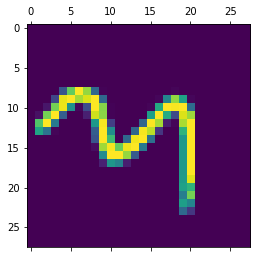

In [29]:
plt.matshow(x_train_2d[4])

In [30]:
y_train[4]

4.0

In [59]:
x_train[0].shape , y_train[0].shape

((784,), ())

In [60]:
y_train[3]

3.0

In [51]:
x_train.shape[1]

784

## 1st neural net

In [84]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(x_train.shape[1],), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 969us/step - loss: 10.2646 - accuracy: 0.8589
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.5428 - accuracy: 0.9508
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3449 - accuracy: 0.9543: 0s - l
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2842 - accuracy: 0.9587
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1124 - accuracy: 0.9612


In [85]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 960us/step - loss: 3.7917 - accuracy: 0.9487


[3.7917258739471436, 0.9487000107765198]

## 2nd neural net (standardize x vector to (0,1) )

In [86]:
x_train_stan = x_train / 255
x_test_stan = x_test / 255

In [87]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(x_train_stan.shape[1],), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_stan, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5510 - accuracy: 0.8748
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1387 - accuracy: 0.9659
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1143 - accuracy: 0.9719
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1008 - accuracy: 0.9737
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0887 - accuracy: 0.9769


In [88]:
model.evaluate(x_test_stan, y_test)

313/313 [==============================] - 0s 888us/step - loss: 0.1304 - accuracy: 0.9667


[0.13040940463542938, 0.96670001745224]

In [109]:
# y_predicted = model.predict(x_test)
# always recognized to digits, 0 and the other one. not giving a single vector in the end with 1 clear max, but 2 ones. 
y_predicted = model.predict(x_test_stan)
y_predicted.shape

(10000, 10)

In [106]:
y_predicted

array([[9.9869752e-01, 4.5393894e-19, 1.6362071e-03, ..., 8.0778599e-03,
        9.7098491e-06, 6.6590879e-08],
       [3.7301403e-01, 9.8403132e-01, 5.8761239e-04, ..., 3.0000389e-02,
        2.4606283e-05, 2.3527861e-02],
       [5.9395671e-02, 1.1478435e-04, 8.6045909e-01, ..., 4.1706860e-02,
        3.0842382e-01, 1.9834644e-01],
       ...,
       [7.3959994e-01, 5.2890119e-09, 2.4456978e-03, ..., 9.9999738e-01,
        1.3556647e-09, 4.3250884e-06],
       [3.4654486e-01, 1.0233161e-15, 3.0130225e-01, ..., 1.2366231e-09,
        9.9550772e-01, 1.6088024e-01],
       [9.2801958e-02, 1.9704716e-10, 1.0462443e-04, ..., 2.8179288e-03,
        5.1206531e-05, 9.9459875e-01]], dtype=float32)

In [110]:
y_predicted[1]

array([3.7301403e-01, 9.8403132e-01, 5.8761239e-04, 8.6641729e-02,
       2.8660238e-01, 8.3739966e-02, 5.3066373e-01, 3.0000389e-02,
       2.4606283e-05, 2.3527861e-02], dtype=float32)

In [111]:
np.argmax(y_predicted[1])

1

In [116]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [119]:
y_test[:10], y_predicted_labels[:10]§

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [120]:
y_test[:10] == y_predicted_labels[:10]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## accuracy of prediciont

In [127]:
conf_m = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
conf_m

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[940,  10,   1,   5,   4,  16,   8,   2,   6,   8],
       [  3, 982,   0,   1,   7,   0,   2,   3,   2,   0],
       [  7,   4, 957,  11,  11,   7,   0,   1,   1,   1],
       [  8,   4,  16, 957,   3,   4,   2,   0,   3,   3],
       [  8,  13,   8,   4, 955,   3,   1,   3,   1,   4],
       [ 14,   0,   5,   0,   9, 964,   1,   5,   1,   1],
       [  0,   6,   0,   3,   2,   0, 976,   0,   0,  13],
       [  1,   0,   0,   0,   0,   4,   1, 994,   0,   0],
       [  3,   0,   1,   0,   4,   2,   0,   0, 979,  11],
       [  3,   3,   4,   2,   4,   3,   9,   1,   8, 963]], dtype=int32)>

Text(69.0, 0.5, 'Truth')

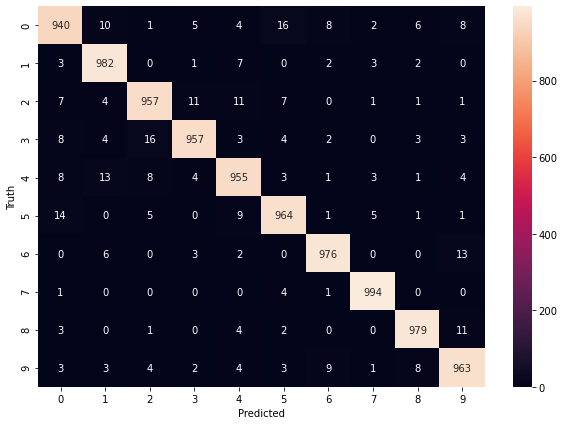

In [126]:
plt.figure(figsize = (10,7))
sn.heatmap(conf_m, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [136]:
model = keras.Sequential([
    keras.layers.Dense(700, input_shape=(x_train_stan.shape[1],), activation='relu'),
    keras.layers.Dense(600, activation = 'relu'),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dense(400, activation = 'relu'),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(200, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_stan, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2700 - accuracy: 0.9251
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0776 - accuracy: 0.9831
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0560 - accuracy: 0.9875
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0487 - accuracy: 0.9896
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0395 - accuracy: 0.9911


In [137]:
model.evaluate(x_test_stan, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1291 - accuracy: 0.9797


[0.1290547400712967, 0.9797000288963318]

Text(69.0, 0.5, 'Truth')

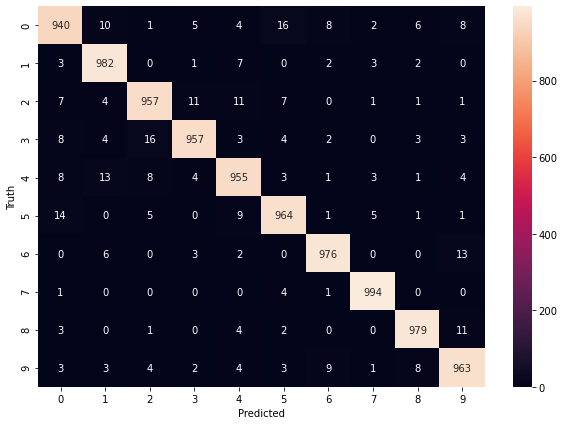

In [138]:
conf_m = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(conf_m, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')